In [1]:
from mohan.Similarity import Similarity
#from mohan.ColavSimilarity import parse_doi, parse_string
from joblib import Parallel, delayed
import pickle
import numpy as np
#from mohan.ColavSimilarity import ColavSimilarity, parse_doi, parse_string
from elasticsearch import Elasticsearch, __version__ as es_version
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
s = Similarity("openalex_parsed",es_uri="172.19.31.8")

In [3]:
# open a file, where you stored the pickled data
file = open('dataset_full.pkl', 'rb')
# dump information to that file
data = pickle.load(file)
# close the file
file.close()

In [4]:

scopus = []
#np.random.shuffle(data["p"])
#np.random.shuffle(data["n"])
for i in data["p"]:
    scopus.append((i,True))
for i in data["n"]:
    scopus.append((i,False))
np.random.shuffle(scopus) #shuffle is inplace
results = Parallel(n_jobs=72,backend='threading',verbose=1)(delayed(s.search_work)(rec[0]['Title'],rec[0]['Source title'],rec[0]['Year'],
                 rec[0]['Authors'].split(",")[0:10], rec[0]['Volume'], rec[0]['Issue'], rec[0]['Page start'], rec[0]['Page end']) for rec in scopus)
                     #use_es_thold = False, es_thold_low = 0, es_thold_high = 180,#) for rec in scopus)
                     #ratio_thold = 90, partial_thold = 92, low_thold = 81) for rec in scopus)


[Parallel(n_jobs=72)]: Using backend ThreadingBackend with 72 concurrent workers.
[Parallel(n_jobs=72)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=72)]: Done 306 tasks      | elapsed:    1.1s
[Parallel(n_jobs=72)]: Done 656 tasks      | elapsed:    2.2s
[Parallel(n_jobs=72)]: Done 1106 tasks      | elapsed:    4.3s
[Parallel(n_jobs=72)]: Done 1656 tasks      | elapsed:    6.0s
[Parallel(n_jobs=72)]: Done 2306 tasks      | elapsed:    8.5s
[Parallel(n_jobs=72)]: Done 3056 tasks      | elapsed:   11.4s
[Parallel(n_jobs=72)]: Done 3906 tasks      | elapsed:   14.5s
[Parallel(n_jobs=72)]: Done 4856 tasks      | elapsed:   18.0s
[Parallel(n_jobs=72)]: Done 5906 tasks      | elapsed:   21.9s
[Parallel(n_jobs=72)]: Done 7056 tasks      | elapsed:   26.3s
[Parallel(n_jobs=72)]: Done 8306 tasks      | elapsed:   30.9s
[Parallel(n_jobs=72)]: Done 9656 tasks      | elapsed:   36.1s
[Parallel(n_jobs=72)]: Done 11106 tasks      | elapsed:   41.6s
[Parallel(n_jobs=72)]: Done 12656 task

In [5]:
actual = []
predicted = []
for i in range(len(results)):
    actual.append(scopus[i][1])
    if results[i] is not None:
        predicted.append(True)
    else:
        predicted.append(False)


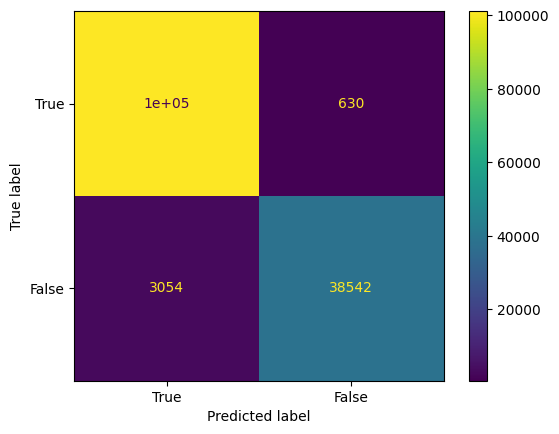

In [6]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)
confusion_matrix = np.flip(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [7]:
fn = confusion_matrix[0][1]*100/(confusion_matrix[0][0]+confusion_matrix[0][1])
fn

0.6190246922071669

In [8]:
fp = confusion_matrix[1][0]*100/(confusion_matrix[1][1]+confusion_matrix[1][0])
fp

7.342052120396192